<a href="https://colab.research.google.com/github/gibran96/ml-educative-course/blob/main/keras_mnist_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.2043 - accuracy: 0.9373 - val_loss: 0.1431 - val_accuracy: 0.9572
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1161 - accuracy: 0.9641 - val_loss: 0.1384 - val_accuracy: 0.9602
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0849 - accuracy: 0.9722 - val_loss: 0.1173 - val_accuracy: 0.9626
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0732 - accuracy: 0.9765 - val_loss: 0.1123 - val_accuracy: 0.9678
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0608 - accuracy: 0.9812 - val_loss: 0.1007 - val_accuracy: 0.9696
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.1035 - val_accuracy: 0.9706
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0445 - accuracy: 0.9853 - val_loss: 0.0938 - val_accu

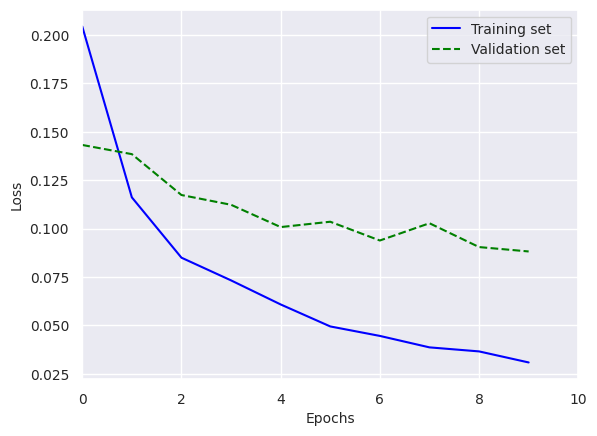

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.initializers import glorot_normal
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

# Splitting the dataset in test, train and validation sets
(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = mnist.load_data()
X_train = X_train_raw.reshape(X_train_raw.shape[0], -1) / 255
X_test_all = X_test_raw.reshape(X_test_raw.shape[0], -1) / 255
X_validation, X_test = np.split(X_test_all, 2)
Y_train = to_categorical(Y_train_raw)
Y_validation, Y_test = np.split(to_categorical(Y_test_raw), 2)

# Write your code here to craft the neural network
model = Sequential()
model.add(Dense(1200, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(500, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))




# Model compilation
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(learning_rate=0.001),
             metrics=['accuracy'])

# Starting the training phase
history = model.fit(X_train, Y_train,
                    validation_data=(X_validation, Y_validation),
                    epochs=10, batch_size=32)

# Plot loss for validation and training sets
plot(history)

In [1]:
# A utility function that plots the training loss and validation loss from
# a Keras history object.

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


def plot(history):
    sns.set()  # Switch to the Seaborn look
    plt.plot(history.history['loss'], label='Training set',
             color='blue', linestyle='-')
    plt.plot(history.history['val_loss'], label='Validation set',
             color='green', linestyle='--')
    plt.xlabel("Epochs", fontsize=10)
    plt.ylabel("Loss", fontsize=10)
    plt.xlim(0, len(history.history['loss']))
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.show()